# SICLIFE ANALYSIS

### Mount repo from drive

In [666]:
# from google.colab import drive
# drive.mount('/content/drive')

In [667]:
# %cd '/content/drive/MyDrive/insurance-claims'

### Import libraires and load the dataset

In [668]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
# Load datasets
# poli = pd.read_csv('./data/data_poli.csv')
# mmc = pd.read_csv('./data/mmc1.csv')
# sic = pd.read_csv('./data/SICLIFE DATA.csv')
# poli.head()
# mmc.head()
df = pd.read_csv('./data/SICLIFE DATA.csv')
df.head()

,POLICY,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION,EXPIRY,MONTHLY,SUM,PAID PREMIUM,PREMIUM,TOTAL PREMIUM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,DATE,DATE,PLANNED,ASSURED,2024,COUNT,TO DATE
1,1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,1-Jul-18,1-Sep-27,30,500,87.3,3,"1,891.50"
2,1,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,1-Sep-21,1-Feb-48,60,"2,000.00",174.6,3,"1,687.80"
3,2,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,1-Dec-21,1-Dec-52,150,"2,000.00",436.5,3,"3,783.00"
4,3,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,1-Feb-22,1-Feb-39,50,"1,500.00",145.5,3,"1,164.00"


* Dataset has missing data in it and thus needs further preprocessing and cleaning

In [669]:
# Rename the columns to drop the first row
df = df.rename(columns={
    'INCEPTION': 'INCEPTION DATE',
    'EXPIRY': 'EXPIRY DATE',
    'MONTHLY': 'MONTHLY PAYMENT',
    'SUM': 'SUM ASSURED',
    'PREMIUM': 'PREMIUM_2024',
    })


* Rename the columns for better navigation

In [670]:
df.columns

Index(['POLICY', 'POLICY NO.', 'ASSURED', 'GENDER', 'OCCUP.', 'BRANCH',
       'INST.', 'PLAN', 'PROPOSALS', 'INCEPTION DATE', 'EXPIRY DATE',
       'MONTHLY PAYMENT', 'SUM ASSURED', 'PAID PREMIUM', 'PREMIUM_2024',
       'TOTAL PREMIUM'],
      dtype='object')

In [671]:
# Categorize to type of policy
policy_type_map = {
    'FAMILY SECURITY PLAN': 'TERM INSURANCE',
    'FLEXI CHILD EDUCATION': 'ENDOWMENT INSURANCE',
    'EDUCATION': 'WHOLE LIFE INSURANCE'
}

# # Create a new column for policy type
df['POLICY_TYPE'] = df['PLAN'].map(policy_type_map)
# df['PROD_TYPE'] = df['PLAN'].str.lower()  # Resolve inconsistencies


In [672]:
df.head()

,POLICY,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION DATE,EXPIRY DATE,MONTHLY PAYMENT,SUM ASSURED,PAID PREMIUM,PREMIUM_2024,TOTAL PREMIUM,POLICY_TYPE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,DATE,DATE,PLANNED,ASSURED,2024,COUNT,TO DATE,NaN
1,1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,1-Jul-18,1-Sep-27,30,500,87.3,3,"1,891.50",TERM INSURANCE
2,1,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,1-Sep-21,1-Feb-48,60,"2,000.00",174.6,3,"1,687.80",TERM INSURANCE
3,2,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,1-Dec-21,1-Dec-52,150,"2,000.00",436.5,3,"3,783.00",TERM INSURANCE
4,3,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,1-Feb-22,1-Feb-39,50,"1,500.00",145.5,3,"1,164.00",TERM INSURANCE


### Drop the 1st row and 1st column

In [673]:
# Drop the first row
df = df.drop(df.index[0])

# Drop the first column
df = df.drop(df.columns[0], axis=1)
df.head()

,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION DATE,EXPIRY DATE,MONTHLY PAYMENT,SUM ASSURED,PAID PREMIUM,PREMIUM_2024,TOTAL PREMIUM,POLICY_TYPE
1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,1-Jul-18,1-Sep-27,30,500,87.3,3,"1,891.50",TERM INSURANCE
2,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,1-Sep-21,1-Feb-48,60,"2,000.00",174.6,3,"1,687.80",TERM INSURANCE
3,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,1-Dec-21,1-Dec-52,150,"2,000.00",436.5,3,"3,783.00",TERM INSURANCE
4,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,1-Feb-22,1-Feb-39,50,"1,500.00",145.5,3,"1,164.00",TERM INSURANCE
5,UKS2024T00204,SAMUEL,MALE,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,1-Feb-22,1-Feb-51,100,"2,000.00",0,0,100,TERM INSURANCE


In [674]:
# Convert data types
# Change the format to match the date string format
df['INCEPTION DATE'] = pd.to_datetime(df['INCEPTION DATE'],format="%d-%b-%y")
df['EXPIRY DATE'] = pd.to_datetime(df['EXPIRY DATE'],format="%d-%b-%y")
df['MONTHLY PAYMENT'] = df['MONTHLY PAYMENT'].astype(float)
df['SUM ASSURED'] = df['SUM ASSURED'].astype(str).str.replace(',', '').astype(float)
df['PAID PREMIUM'] = df['PAID PREMIUM'].astype(str).str.replace(',', '').astype(float)
df['PREMIUM_2024'] = df['PREMIUM_2024'].fillna(0).astype(int)
df['TOTAL PREMIUM'] = df['TOTAL PREMIUM'].astype(str).str.replace(',', '').astype(float)
df


,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION DATE,EXPIRY DATE,MONTHLY PAYMENT,SUM ASSURED,PAID PREMIUM,PREMIUM_2024,TOTAL PREMIUM,POLICY_TYPE
1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,2018-07-01,2027-09-01,30.0,500.0,87.3,3,1891.5,TERM INSURANCE
2,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,2021-09-01,2048-02-01,60.0,2000.0,174.6,3,1687.8,TERM INSURANCE
3,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,2021-12-01,2052-12-01,150.0,2000.0,436.5,3,3783.0,TERM INSURANCE
4,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,2022-02-01,2039-02-01,50.0,1500.0,145.5,3,1164.0,TERM INSURANCE
5,UKS2024T00204,SAMUEL,MALE,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,2022-02-01,2051-02-01,100.0,2000.0,0.0,0,100.0,TERM INSURANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN
617,NaN,NaN,"1,143,560.00",50,NaN,"186,648.45",NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN


In [675]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
POLICY NO.          5
ASSURED             5
GENDER              4
OCCUP.              5
BRANCH              5
INST.               4
PLAN                5
PROPOSALS           5
INCEPTION DATE      5
EXPIRY DATE         5
MONTHLY PAYMENT     5
SUM ASSURED         5
PAID PREMIUM        5
PREMIUM_2024        0
TOTAL PREMIUM       5
POLICY_TYPE        10
dtype: int64


### Drop missing values and verify if there are any missing variables.


In [676]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 1 to 615
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   POLICY NO.       609 non-null    object        
 1   ASSURED          609 non-null    object        
 2   GENDER           609 non-null    object        
 3   OCCUP.           609 non-null    object        
 4   BRANCH           609 non-null    object        
 5   INST.            609 non-null    object        
 6   PLAN             609 non-null    object        
 7   PROPOSALS        609 non-null    object        
 8   INCEPTION DATE   609 non-null    datetime64[ns]
 9   EXPIRY DATE      609 non-null    datetime64[ns]
 10  MONTHLY PAYMENT  609 non-null    float64       
 11  SUM ASSURED      609 non-null    float64       
 12  PAID PREMIUM     609 non-null    float64       
 13  PREMIUM_2024     609 non-null    int32         
 14  TOTAL PREMIUM    609 non-null    float64       

In [677]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df = df.copy()

# Perform the operations on the copy
df.loc[:, 'INCEPTION DATE'] = pd.to_datetime(df['INCEPTION DATE'], errors='coerce')
df.loc[:, 'EXPIRY DATE'] = pd.to_datetime(df['EXPIRY DATE'], errors='coerce')
df.loc[:, 'POLICY_DURATION'] = (df['EXPIRY DATE'] - df['INCEPTION DATE']).dt.days / 365.25

# Now you can work with df without warnings
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
POLICY NO.         0
ASSURED            0
GENDER             0
OCCUP.             0
BRANCH             0
INST.              0
PLAN               0
PROPOSALS          0
INCEPTION DATE     0
EXPIRY DATE        0
MONTHLY PAYMENT    0
SUM ASSURED        0
PAID PREMIUM       0
PREMIUM_2024       0
TOTAL PREMIUM      0
POLICY_TYPE        0
POLICY_DURATION    0
dtype: int64


In [678]:
# Identify duplicate records
duplicates = df.duplicated()
print(f"Number of duplicate records: {duplicates.sum()}")
if duplicates.any():
    print("Duplicate records:")
    print(data[duplicates])


Number of duplicate records: 0


### Round up to whole numbers

In [679]:
df['POLICY_DURATION'] = df['POLICY_DURATION'].round().astype(int)


### Descriptive Statistics


In [680]:
df.select_dtypes(include=['int','float']).describe()

,MONTHLY PAYMENT,SUM ASSURED,PAID PREMIUM,PREMIUM_2024,TOTAL PREMIUM,POLICY_DURATION
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,93.484401,1857.241379,221.562939,2.440066,305.496650,22.341544
std,66.288148,338.951958,194.529426,0.821246,339.650286,6.481370
min,30.000000,0.000000,0.000000,0.000000,29.100000,3.000000
25%,50.000000,2000.000000,100.880000,2.000000,135.800000,19.000000
50%,80.000000,2000.000000,174.600000,3.000000,200.000000,23.000000
75%,100.000000,2000.000000,291.000000,3.000000,388.000000,27.000000
max,500.000000,2000.000000,2328.000000,4.000000,3880.000000,38.000000


In [681]:
# Hover on it to see the interactions

fig = px.histogram(df, x='PREMIUM_2024', nbins=5, title='Premium Distribution', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(autosize=False, width=500, height=500)
fig.show()


###  Group the policy durations


In [682]:
# Create policy duration category
df.loc[:, 'POLICY_DURATION_CATEGORY'] = pd.cut(df['POLICY_DURATION'], bins=[0, 5, 10, 20, 50], labels=['<5 years', '5-10 years', '10-20 years', '>20 years'])


### Gender Distribution

In [683]:
# Hover on it to see the interactions
gender_counts = df['GENDER'].value_counts()
fig = px.pie(names=gender_counts.index, values=gender_counts.values, title='Gender Distribution', hole=0.3)
fig.show()


In [684]:
# # Convert only boolean columns to integers
# bool_cols = [col for col in df_encoded if df_encoded[col].dropna().value_counts().index.isin([0,1]).all()]
# df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
# df_encoded[bool_cols]


In [685]:
# pip install statsmodels
df['GENDER'] = df['GENDER'].map({'MALE': 1, 'FEMALE': 0})
df

,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION DATE,EXPIRY DATE,MONTHLY PAYMENT,SUM ASSURED,PAID PREMIUM,PREMIUM_2024,TOTAL PREMIUM,POLICY_TYPE,POLICY_DURATION,POLICY_DURATION_CATEGORY
1,UKS2023T03696,BEATRICE,0,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,2018-07-01,2027-09-01,30.0,500.0,87.30,3,1891.50,TERM INSURANCE,9,5-10 years
2,UKS2023T03701,DANIEL,1,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,2021-09-01,2048-02-01,60.0,2000.0,174.60,3,1687.80,TERM INSURANCE,26,>20 years
3,UKS2024T00359,JEMIMA,0,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,2021-12-01,2052-12-01,150.0,2000.0,436.50,3,3783.00,TERM INSURANCE,31,>20 years
4,UKS2023T03279,KWABENA,1,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,2022-02-01,2039-02-01,50.0,1500.0,145.50,3,1164.00,TERM INSURANCE,17,10-20 years
5,UKS2024T00204,SAMUEL,1,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,2022-02-01,2051-02-01,100.0,2000.0,0.00,0,100.00,TERM INSURANCE,29,>20 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,UKS2024T00629,ESTHER,0,SEAMTRESS,ACCRA NO BRANCH,CASH,FLEXI CHILD EDUCATION,4-Mar-24,2024-03-01,2041-05-01,100.0,2000.0,1300.00,2,1300.00,ENDOWMENT INSURANCE,17,10-20 years
612,UKS2024T00644,JOHN,1,EDUCATIONIST,ACCRA NO BRANCH,CASH,FLEXI CHILD EDUCATION,4-Mar-24,2024-03-01,2049-09-01,200.0,2000.0,200.00,1,200.00,ENDOWMENT INSURANCE,26,>20 years
613,UKS2024T00630,FRANCIS,1,PASTOR,ACCRA NO BRANCH,CASH,FAMILY SECURITY PLAN,4-Mar-24,2024-03-01,2038-08-01,100.0,1500.0,100.00,1,100.00,TERM INSURANCE,14,10-20 years
614,UKS2024T00690,SILAS,1,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,13-Mar-24,2024-03-01,2050-02-01,100.0,0.0,100.88,1,100.88,TERM INSURANCE,26,>20 years


### Correlation Matrix

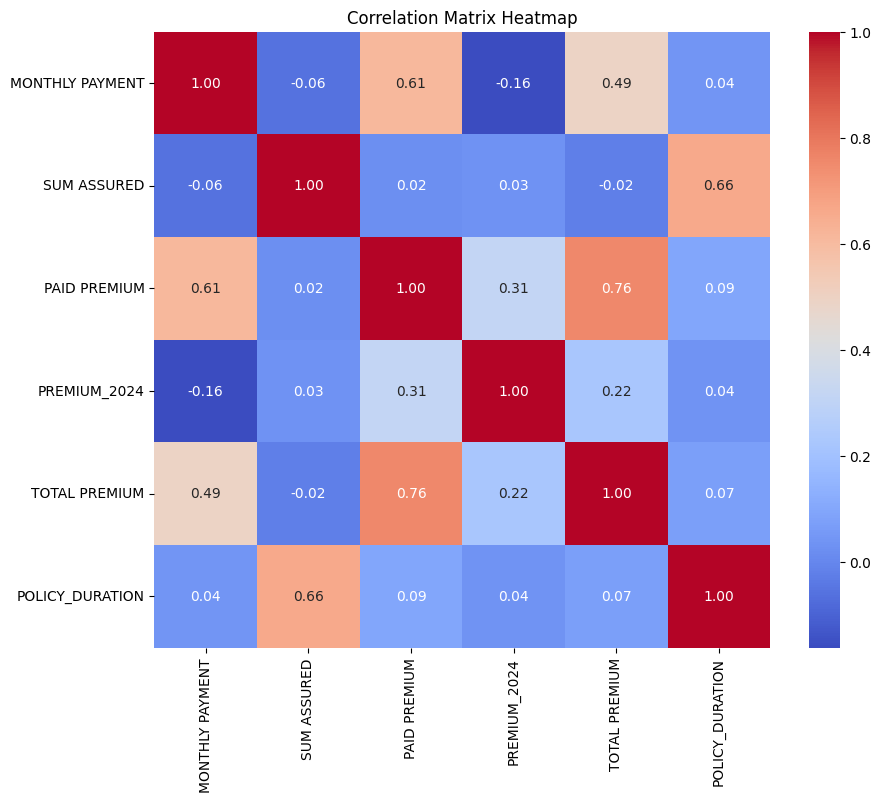

In [686]:
df_corr = df.select_dtypes(include=['int32', 'float64'])

# Calculate the correlation matrix
corr = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Inferential Statistics


In [687]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('PREMIUM_2024 ~ POLICY_DURATION + GENDER + POLICY_TYPE  ', data=df).fit()
print(model.summary())

# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('PREMIUM_2024',axis=1)
y = df['PREMIUM_2024']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

                            OLS Regression Results                            
Dep. Variable:           PREMIUM_2024   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.194
Date:                Sun, 09 Jun 2024   Prob (F-statistic):              0.312
Time:                        23:36:11   Log-Likelihood:                -741.30
No. Observations:                 609   AIC:                             1493.
Df Residuals:                     604   BIC:                             1515.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Model 

In [688]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Initialize a dictionary to hold the results
model_results = {}

# Loop through the models dictionary and fit each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    model_results[model_name] = accuracy

# Print the results
for model_name, accuracy in model_results.items():
    print(f"{model_name}: {accuracy}")


ValueError: could not convert string to float: 'UKS2024T00139'

In [689]:
df.head()

,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION DATE,EXPIRY DATE,MONTHLY PAYMENT,SUM ASSURED,PAID PREMIUM,PREMIUM_2024,TOTAL PREMIUM,POLICY_TYPE,POLICY_DURATION,POLICY_DURATION_CATEGORY
1,UKS2023T03696,BEATRICE,0,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,2018-07-01,2027-09-01,30.0,500.0,87.3,3,1891.5,TERM INSURANCE,9,5-10 years
2,UKS2023T03701,DANIEL,1,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,2021-09-01,2048-02-01,60.0,2000.0,174.6,3,1687.8,TERM INSURANCE,26,>20 years
3,UKS2024T00359,JEMIMA,0,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,2021-12-01,2052-12-01,150.0,2000.0,436.5,3,3783.0,TERM INSURANCE,31,>20 years
4,UKS2023T03279,KWABENA,1,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,2022-02-01,2039-02-01,50.0,1500.0,145.5,3,1164.0,TERM INSURANCE,17,10-20 years
5,UKS2024T00204,SAMUEL,1,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,2022-02-01,2051-02-01,100.0,2000.0,0.0,0,100.0,TERM INSURANCE,29,>20 years
